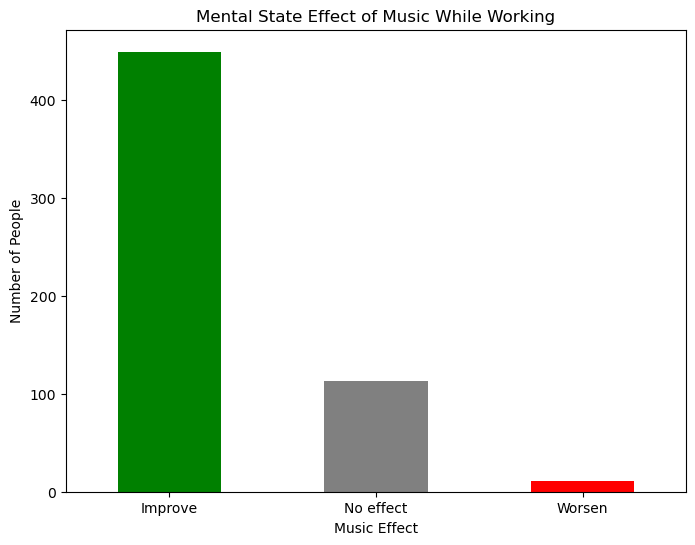

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Data_Science_Survey.csv")

# Filter only people who listen to music while working
work_df = df[df["While working"] == "Yes"]

# Count how many said "Improve", "No effect", or "Worsen"
effect_counts = work_df["Music effects"].value_counts()

# Plot bar chart
plt.figure(figsize=(8,6))
effect_counts.plot(kind="bar", color=["green", "gray", "red"])

plt.title("Mental State Effect of Music While Working")
plt.xlabel("Music Effect")
plt.ylabel("Number of People")
plt.xticks(rotation=0)
plt.show()

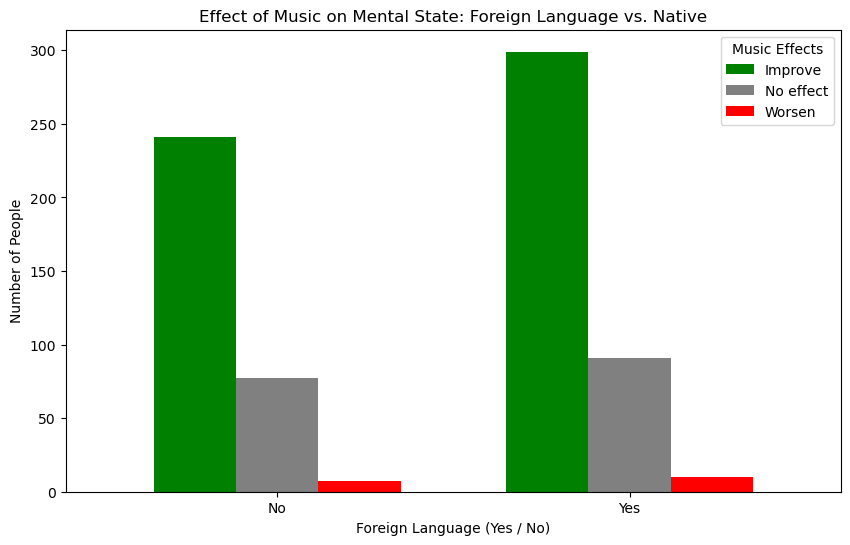

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Data_Science_Survey.csv")

# Group by Foreign language and Music effects
effect_by_foreign = df.groupby(["Foreign languages", "Music effects"]).size().unstack(fill_value=0)

# Plot grouped bar chart
effect_by_foreign.plot(kind="bar", color=["green", "gray", "red"],figsize=(10,6), width=0.7)

plt.title("Effect of Music on Mental State: Foreign Language vs. Native")
plt.xlabel("Foreign Language (Yes / No)")
plt.ylabel("Number of People")
plt.xticks(rotation=0)
plt.legend(title="Music Effects")
plt.show()

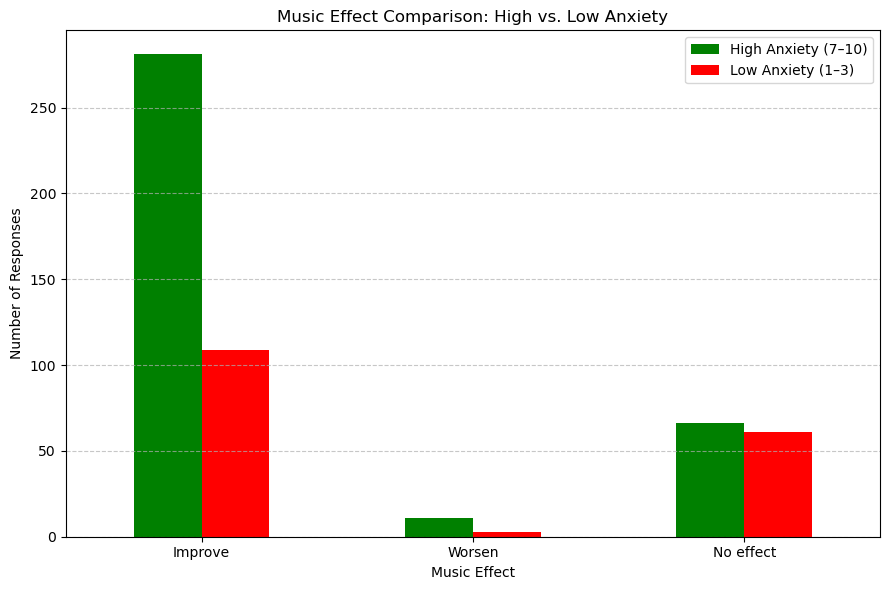

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Read the Excel sheet ---
file_path = "Data_Science_Survey.xls"
sheet_name = "Anxiety"

df = pd.read_excel(file_path, sheet_name=sheet_name)

# --- Step 2: Filter for high and low anxiety groups ---
high_anxiety = df.loc[df["Anxiety"] >= 7].copy()
low_anxiety = df.loc[df["Anxiety"] <= 3].copy()

# --- Step 3: Clean the "Music effects" column in both groups ---
for subset in [high_anxiety, low_anxiety]:
    subset.loc[:, "Music effects"] = (
        subset["Music effects"].astype(str).str.strip().str.capitalize()
    )

# --- Step 4: Count category frequencies ---
categories = ["Improve", "Worsen", "No effect"]
high_counts = high_anxiety["Music effects"].value_counts().reindex(categories, fill_value=0)
low_counts = low_anxiety["Music effects"].value_counts().reindex(categories, fill_value=0)

# Combine counts into a single DataFrame for plotting
compare_df = pd.DataFrame({
    "High Anxiety (7–10)": high_counts,
    "Low Anxiety (1–3)": low_counts
})

# --- Step 5: Create the side-by-side bar chart ---
compare_df.plot(kind="bar", figsize=(9, 6), color=["green", "red"])

plt.title("Music Effect Comparison: High vs. Low Anxiety")
plt.xlabel("Music Effect")
plt.ylabel("Number of Responses")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# --- Step 6: Show the plot ---
plt.show()

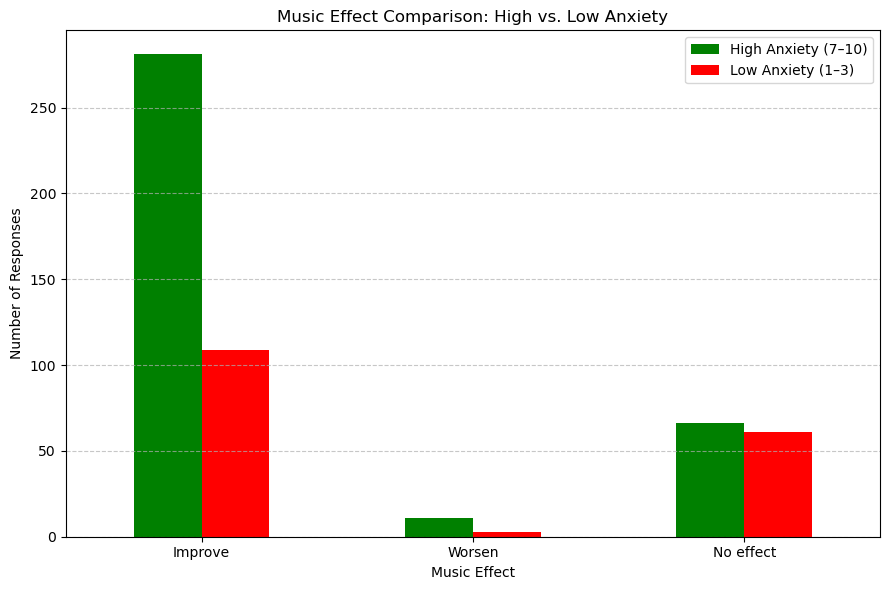

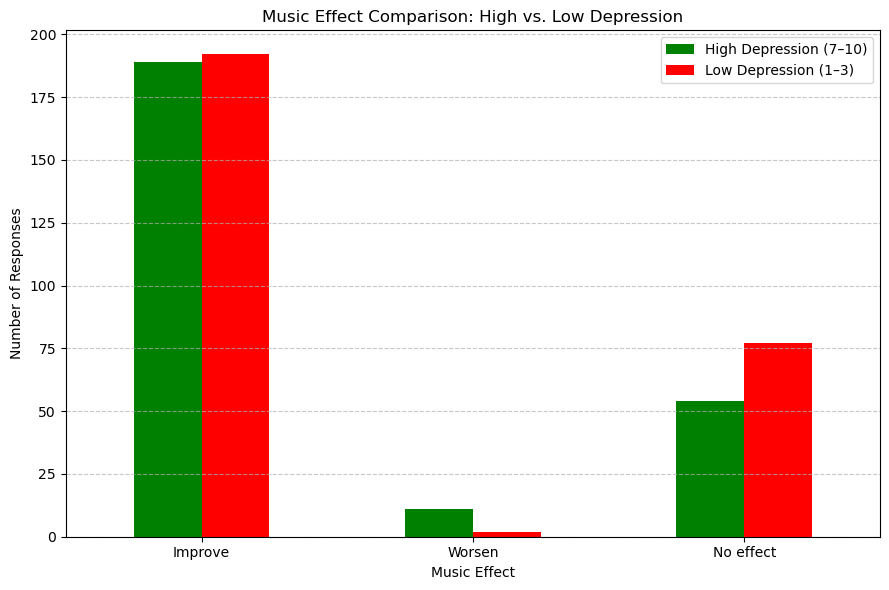

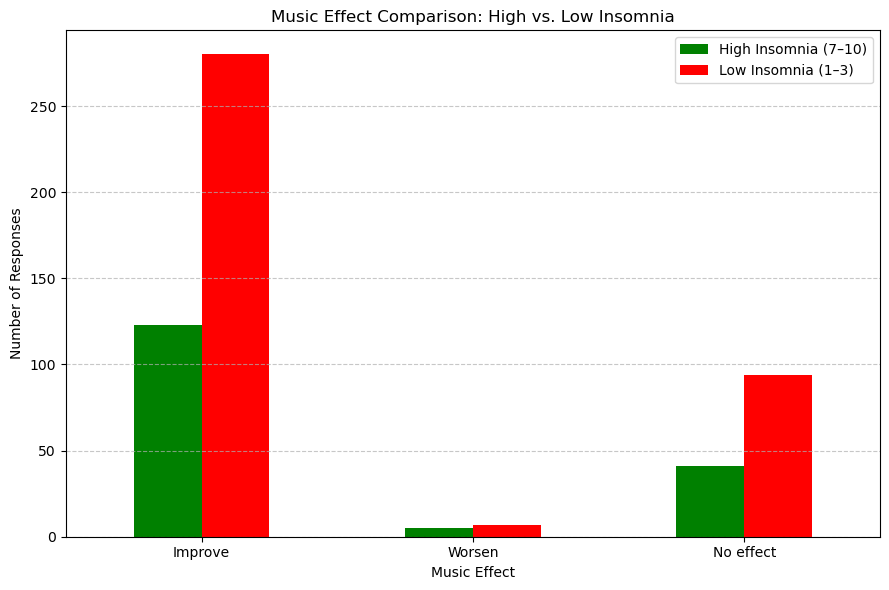

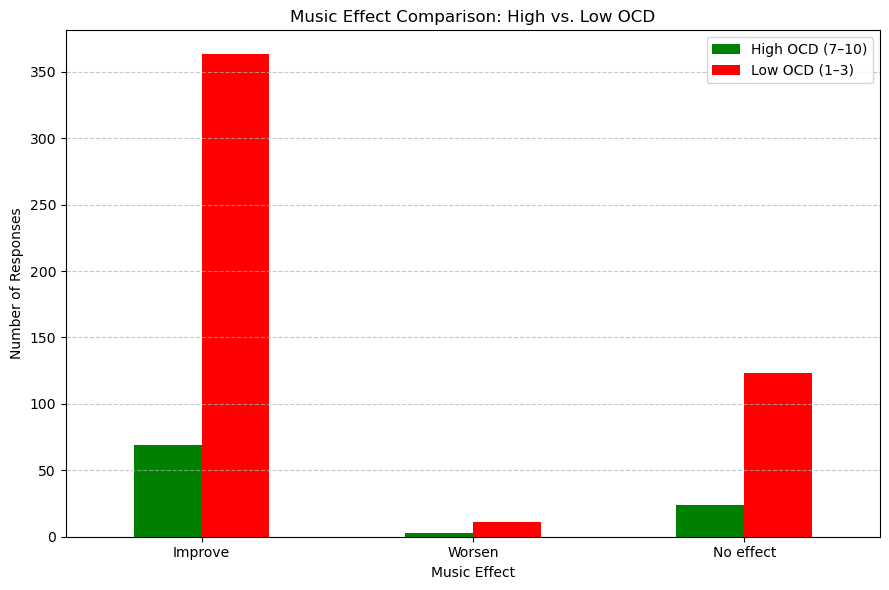

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Define file and sheet/column mappings ---
file_path = "Data_Science_Survey.xls"
sheets = {
    "Anxiety": "Anxiety",
    "Depression": "Depression",
    "Insomnia": "Insomnia",
    "OCD": "OCD"
}

# --- Step 2: Loop through each condition and create comparison charts ---
for sheet_name, condition_col in sheets.items():
    # Read the sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    # Filter high (≥7) and low (≤3) groups
    high = df.loc[df[condition_col] >= 7].copy()
    low = df.loc[df[condition_col] <= 3].copy()

    # Clean "Music effects" values
    for subset in [high, low]:
        subset.loc[:, "Music effects"] = (
            subset["Music effects"].astype(str).str.strip().str.capitalize()
        )

    # Count how many responses fall into each effect category
    categories = ["Improve", "Worsen", "No effect"]
    high_counts = high["Music effects"].value_counts().reindex(categories, fill_value=0)
    low_counts = low["Music effects"].value_counts().reindex(categories, fill_value=0)

    # Combine results into one DataFrame for plotting
    compare_df = pd.DataFrame({
        f"High {condition_col} (7–10)": high_counts,
        f"Low {condition_col} (1–3)": low_counts
    })

    # --- Step 3: Create the bar chart ---
    compare_df.plot(kind="bar", figsize=(9, 6), color=["green", "red"])

    plt.title(f"Music Effect Comparison: High vs. Low {condition_col}")
    plt.xlabel("Music Effect")
    plt.ylabel("Number of Responses")
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

In [17]:
"""import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Define file and sheet/column mapping ---
file_path = "Data_Science_Survey.xls"
sheets = {
    "High BPM": "High BPM",
    "Low BPM": "Low BPM"
}

# --- Step 2: Loop through both sheets and filter by BPM range ---
filtered_data = {}

for sheet_name, bpm_col in sheets.items():
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    # Apply range filters
    if sheet_name == "High BPM":
        df_filtered = df.loc[(df[bpm_col] >= 150) & (df[bpm_col] <= 220)].copy()
    else:  # Low BPM
        df_filtered = df.loc[df[bpm_col] <= 100].copy()

    # Clean "Music effects"
    df_filtered.loc[:, "Music effects"] = (
        df_filtered["Music effects"].astype(str).str.strip().str.capitalize()
    )

    filtered_data[sheet_name] = df_filtered

# --- Step 3: Count responses for each group ---
categories = ["Improve", "Worsen", "No effect"]
high_counts = (
    filtered_data["High BPM"]["Music effects"]
    .value_counts()
    .reindex(categories, fill_value=0)
)
low_counts = (
    filtered_data["Low BPM"]["Music effects"]
    .value_counts()
    .reindex(categories, fill_value=0)
)

# --- Step 4: Combine counts into a DataFrame for comparison ---
compare_df = pd.DataFrame({
    "High BPM (150–220)": high_counts,
    "Low BPM (≤100)": low_counts
})

# --- Step 5: Create the bar chart ---
compare_df.plot(kind="bar", figsize=(9, 6), color=["royalblue", "darkorange"])

plt.title("Music Effect Comparison: High BPM vs. Low BPM")
plt.xlabel("Music Effect")
plt.ylabel("Number of Responses")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
"""

'import pandas as pd\nimport matplotlib.pyplot as plt\n\n# --- Step 1: Define file and sheet/column mapping ---\nfile_path = "Data_Science_Survey.xls"\nsheets = {\n    "High BPM": "High BPM",\n    "Low BPM": "Low BPM"\n}\n\n# --- Step 2: Loop through both sheets and filter by BPM range ---\nfiltered_data = {}\n\nfor sheet_name, bpm_col in sheets.items():\n    df = pd.read_excel(file_path, sheet_name=sheet_name)\n\n    # Apply range filters\n    if sheet_name == "High BPM":\n        df_filtered = df.loc[(df[bpm_col] >= 150) & (df[bpm_col] <= 220)].copy()\n    else:  # Low BPM\n        df_filtered = df.loc[df[bpm_col] <= 100].copy()\n\n    # Clean "Music effects"\n    df_filtered.loc[:, "Music effects"] = (\n        df_filtered["Music effects"].astype(str).str.strip().str.capitalize()\n    )\n\n    filtered_data[sheet_name] = df_filtered\n\n# --- Step 3: Count responses for each group ---\ncategories = ["Improve", "Worsen", "No effect"]\nhigh_counts = (\n    filtered_data["High BPM"]["Mu